# Logistic Regression Gradient Descent

In [127]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

# Loading the data

In [171]:
def load_data():
    data = np.loadtxt("../data/Cardiovascular_Disease_Dataset.csv", delimiter=',', skiprows=1)

    X = data[:,1:-1]
    y = data[:,-1]
    return X, y

X_train, y_train = load_data()
m,n = X_train.shape

f= y_train.shape
print(f)
print(y_train)

(1000,)
[1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 

# Studying the data

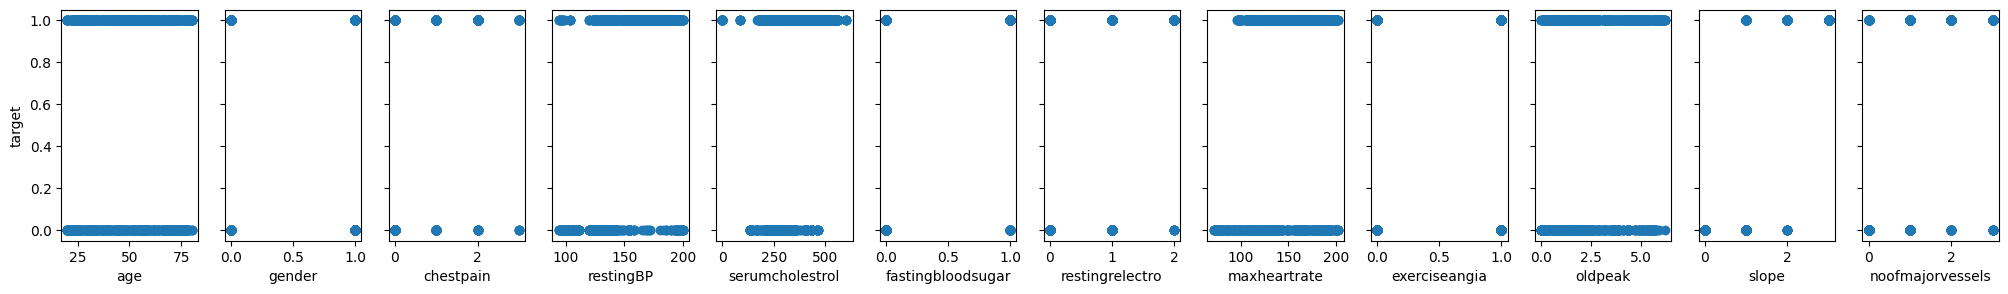

In [129]:
X_features = ['age','gender','chestpain','restingBP','serumcholestrol','fastingbloodsugar','restingrelectro','maxheartrate','exerciseangia','oldpeak','slope','noofmajorvessels','target']
fig,ax=plt.subplots(1, 12, figsize=(25, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("target")
plt.show()

# Feature Scaling

Use a Z-score normalization

$$ z=\frac{x_j^{(i)}-\mu^{(i)}}{\sigma^{(i)}} $$



In [164]:
mu = np.mean(X_train,axis=0)   
sigma = np.std(X_train,axis=0) 
X_norm = (X_train - mu) / sigma

## Model

$$z = \vec w \cdot \vec x + b$$

In [161]:
def model(w, x, b):
    return np.dot(w, x) + b

z = model(np.ones(n,), X_norm[0], 0)
print(z)

3.6352822672300897


# Sigmoid Function

$$g(z) = \frac{1}{1+e^{-z}}$$

In [132]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(0)

0.5

# Logistic Regression Model

$$f_{\vec w, b}(\vec x)=\frac{1}{1+e^{-(\vec w \cdot \vec x + b)}}$$

In [133]:
def logistic_regression_model(w, x, b):
    return sigmoid(model(w, x, b))

logistic_regression_model(np.ones(n,), X_norm[0], 0)

0.9743013519662059

# Logistic Cost Function

$$J_{\vec w,b}(x^{(i)})=-\frac1m \sum_{i=1}^m[y^{(i)}\log(f_{\vec w,b}(\vec x^{(i)})) + (1-y^{(i)})\log(1-f_{\vec w,b}(\vec x^{(i)}))]$$

In [134]:
def cost_function(w, X, b, y):
    m,_ = X.shape
    j_wb = 0

    for i in range (m):
        f_wb = logistic_regression_model(w, X[i], b)
        j_wb += y[i]*np.log(f_wb) + (1-y[i]) * np.log(1 - f_wb)
     
    return (-1/m) * j_wb

cost_function(np.ones(n,), X_norm, 0, y_train)

0.4474847855468461

# Compute Gradients for Logistic Regression

$$\frac{\partial}{\partial w_j}J(\vec w, b) = \frac 1m \sum_{i=1}^m(f_{\vec x, b}(\vec x^{(i)}) - y^{(i)}) * x_j^{(i)}$$

$$\frac{\partial}{\partial b}J(\vec w, b) = \frac 1m \sum_{i=1}^m(f_{\vec x, b}(\vec x^{(i)}) - y^{(i)})$$

In [135]:
def compute_gradient(w, X, b, y):
    m, n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0

    for i in range(m):
        x_i = X[i]
        y_i = y[i]
        err = logistic_regression_model(w, x_i, b) - y_i
        for j in range(n):
            dj_dw[j] += err * x_i[j]
        dj_db += err
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

compute_gradient(np.zeros(n,), X_norm, 0, y_train)

(array([-0.00412415, -0.00778304, -0.27354398, -0.23808622, -0.09641166,
        -0.14966342, -0.21066919, -0.1127007 ,  0.01968016, -0.04839488,
        -0.39354267, -0.24177775]),
 -0.08)

# Gradient Descent

$$w_j = w_j - \alpha \frac{\partial}{\partial w_j}J(\vec w, b)$$
$$b = b - \alpha \frac{\partial}{\partial b}J(\vec w, b)$$

In [159]:
def gradient_descent(w, X, b, y, alpha, iterations):
    w = copy.deepcopy(w)
    b = 0
    J_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(w, X, b, y)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(w, X, b, y)) # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history
    
w, b, J_hist = gradient_descent(np.zeros(n,), X_norm, 0, y_train, 0.01, 1000)

0.6887330497525826
Iteration    0: Cost     0.69
0.6843751434964594
0.6800727247721786
0.675825060864141
0.6716314236285605
0.6674910897472531
0.663403340967388
0.6593674643274645
0.655382752369748
0.6514485033394669
0.6475640213710371
0.6437286166616314
0.6399416056324101
0.6362023110777342
0.6325100623026899
0.6288641952492929
0.6252640526116736
0.6217089839406529
0.6181983457380137
0.6147315015408436
0.6113078219963237
0.6079266849272822
0.6045874753889103
0.6012895857169536
0.5980324155677677
0.5948153719505451
0.5916378692520964
0.5884993292544881
0.5853991811458835
0.582336861524912
0.5793118143988852
0.5763234911761542
0.5733713506529462
0.5704548589949395
0.5675734897138874
0.5647267236395659
0.5619140488873146
0.559134960821438
0.5563889620147179
0.5536755622042867
0.550994278244111
0.5483446340542805
0.5457261605673696
0.5431383956720514
0.5405808841541837
0.5380531776355557
0.5355548345104973
0.5330854198805122
0.5306445054871292
0.5282316696431126
0.5258464971622245
0.52348

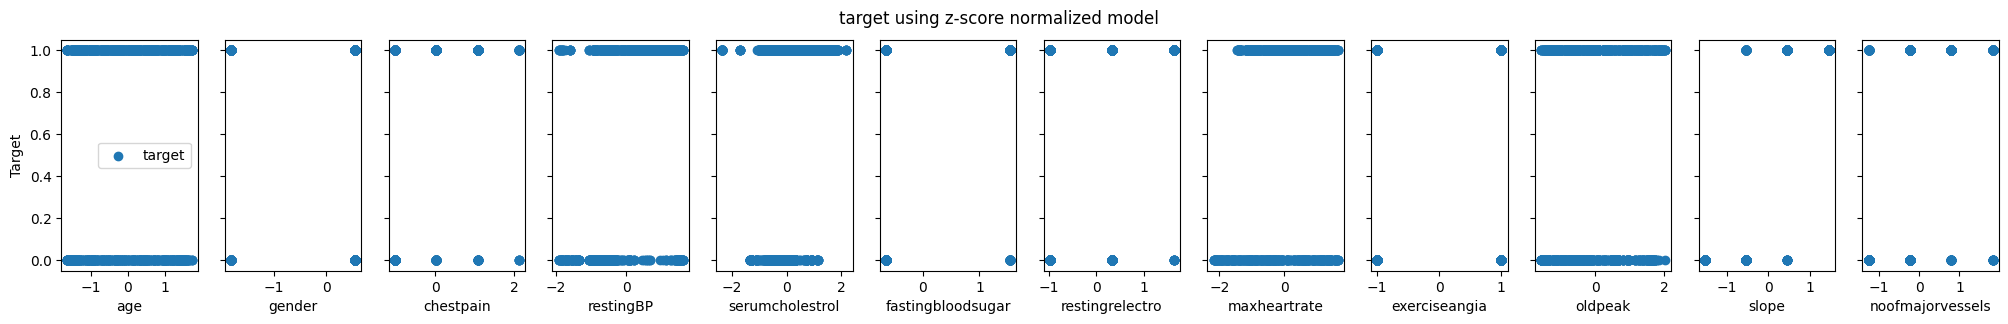

In [150]:
#predict target using normalized features
m = X_norm.shape[0]

fig, ax = plt.subplots(1,12,figsize=(25, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Target"); ax[0].legend()
fig.suptitle("target using z-score normalized model")
plt.show()

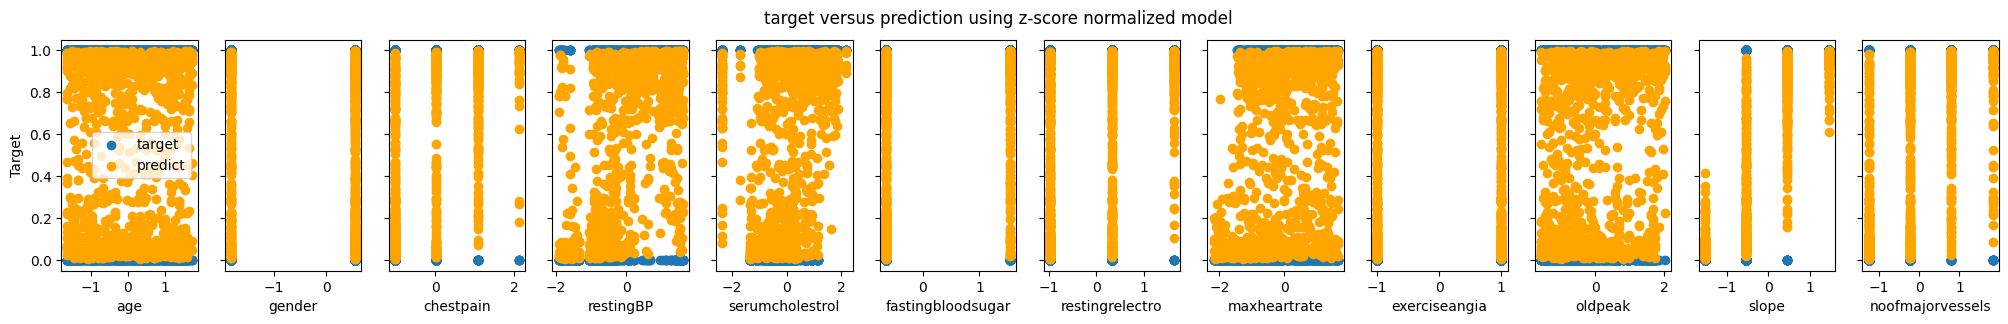

In [149]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = logistic_regression_model(w, X_norm[i], b)

    # plot predictions and targets versus original features    
fig, ax = plt.subplots(1,12,figsize=(25, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_norm[:,i], yp, color="orange", label = 'predict')
ax[0].set_ylabel("Target"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [158]:
# Hold
m,n = X_train.shape

false_positive = 0
false_negative = 0

for i in range(m):
    result_i = logistic_regression_model(w, X_norm[i], b)
    if (result_i > 0.5):
        result_i = 1
    else:
        result_i = 0

    if (result_i == 1 and y_train[i] == 0):
        false_positive += 1

    if (result_i == 0 and y_train[i] == 1):
        false_negative += 1
    print("Result for normalized:", result_i, "vs actual:", y_train[i])

print("Total false positives:", false_positive)
print("Total false negatives:", false_negative)
print("Total predictions:", m)
print("Error rate:", (false_negative + false_positive) / m * 100)


Result for normalized: 1 vs actual: 1.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 0.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 0 vs actual: 0.0
Result for normalized: 1 vs actual: 1.0
Result for normalized: 1 vs actual: 1.0
